# Class Single Recording Code

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from single_tdt_class import *

In [2]:
single_recording_path = r"C:\Users\alber\Downloads\OXT-251-240924-104131"
# behavior_csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Aggression\nac_csvs\n5-240821-085040.csv"

## Bout Data from CSV

In [3]:
tdt_data = tdt.read_block(single_recording_path)
tdt_data_obj = TDTData(tdt_data, single_recording_path)

Found Synapse note file: C:\Users\alber\Downloads\OXT-251-240924-104131\Notes.txt
read from t=0s to t=6187.12s


In [4]:
tdt_data_obj.remove_initial_LED_artifact(t=30)
# tdt_data_obj.remove_final_data_segment(t = 10)
# tdt_data_obj.smooth_and_apply(window_len=1)
# tdt_data_obj.apply_ma_baseline_correction()
tdt_data_obj.align_channels_raw()
tdt_data_obj.compute_dFF()
# tdt_data_obj.combine_consecutive_behaviors(behavior_name='all', bout_time_threshold=2, min_occurrences=1)
# tdt_data_obj.remove_short_behaviors(behavior_name='all', min_duration=0.5)

tdt_data_obj.compute_zscore(method = 'standard')
# tdt_data_obj.extract_manual_annotation_behaviors(behavior_csv_path)
tdt_data_obj.verify_signal()

## Plot Raw Trace

In [5]:
len(tdt_data_obj.streams['DA'])

6263242

In [6]:
# Remove initial LED artifact
tdt_data_obj.remove_initial_LED_artifact(t = 30)
len(tdt_data_obj.streams['DA'])

6263242

In [7]:
tdt_data_obj.remove_final_data_segment(t = 30)
len(tdt_data_obj.streams['DA'])

6232724

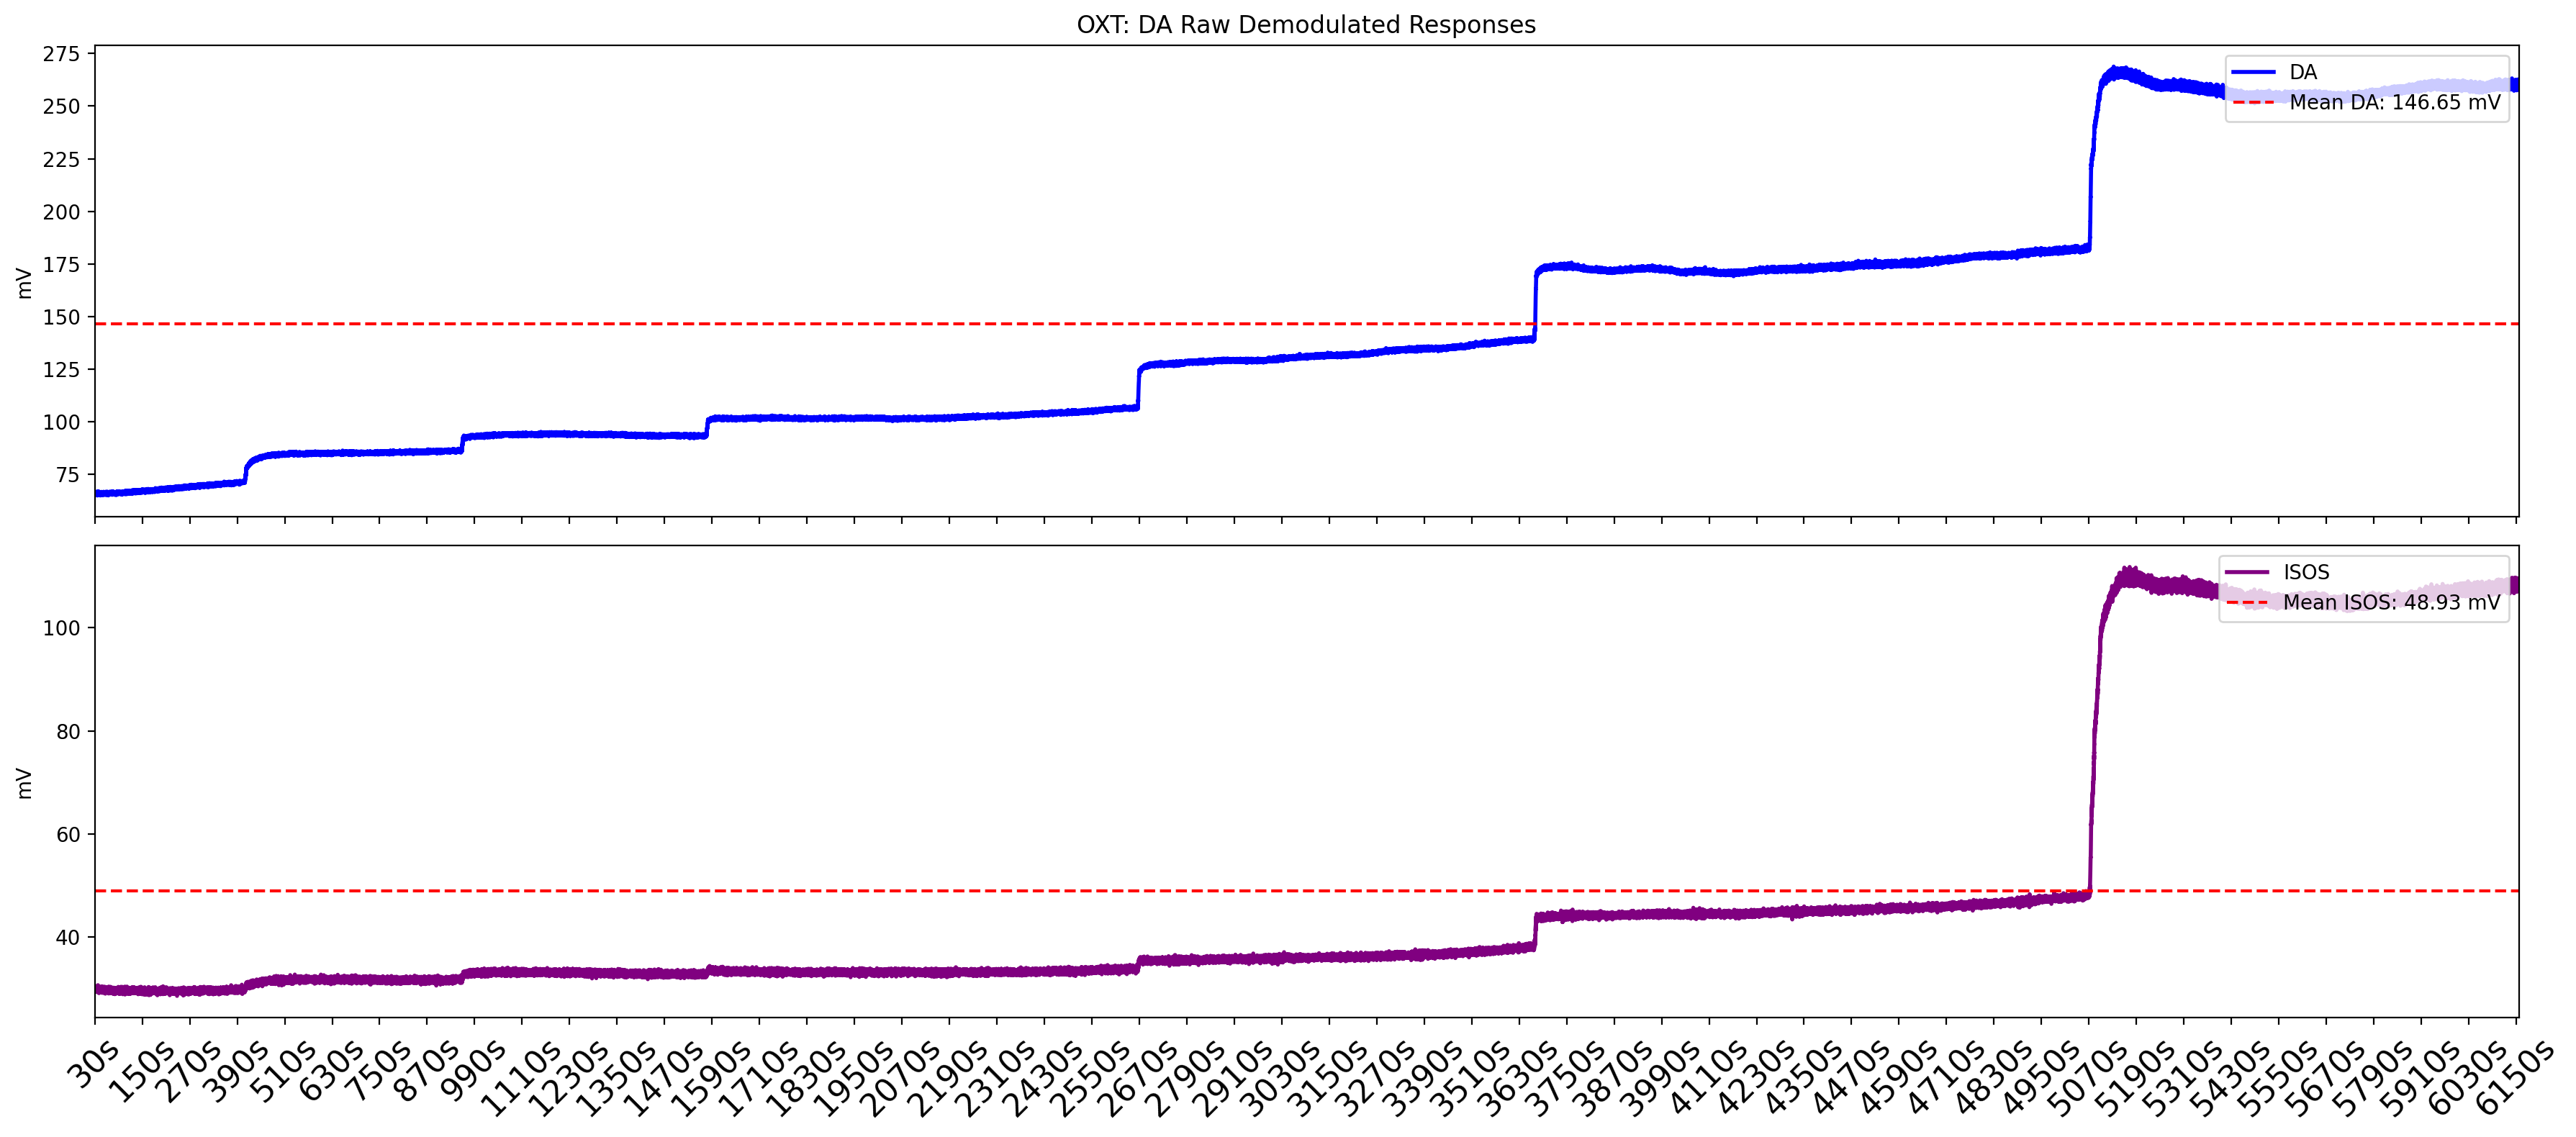

In [8]:
# Plot raw trace
tdt_data_obj.plot_signal('raw')

In [ ]:
# tdt_data_obj.perform_standardization()

In [10]:
tdt_data_obj.align_channels_raw()

ValueError: x and y must have same first dimension, but have shapes (6232724,) and (1,)

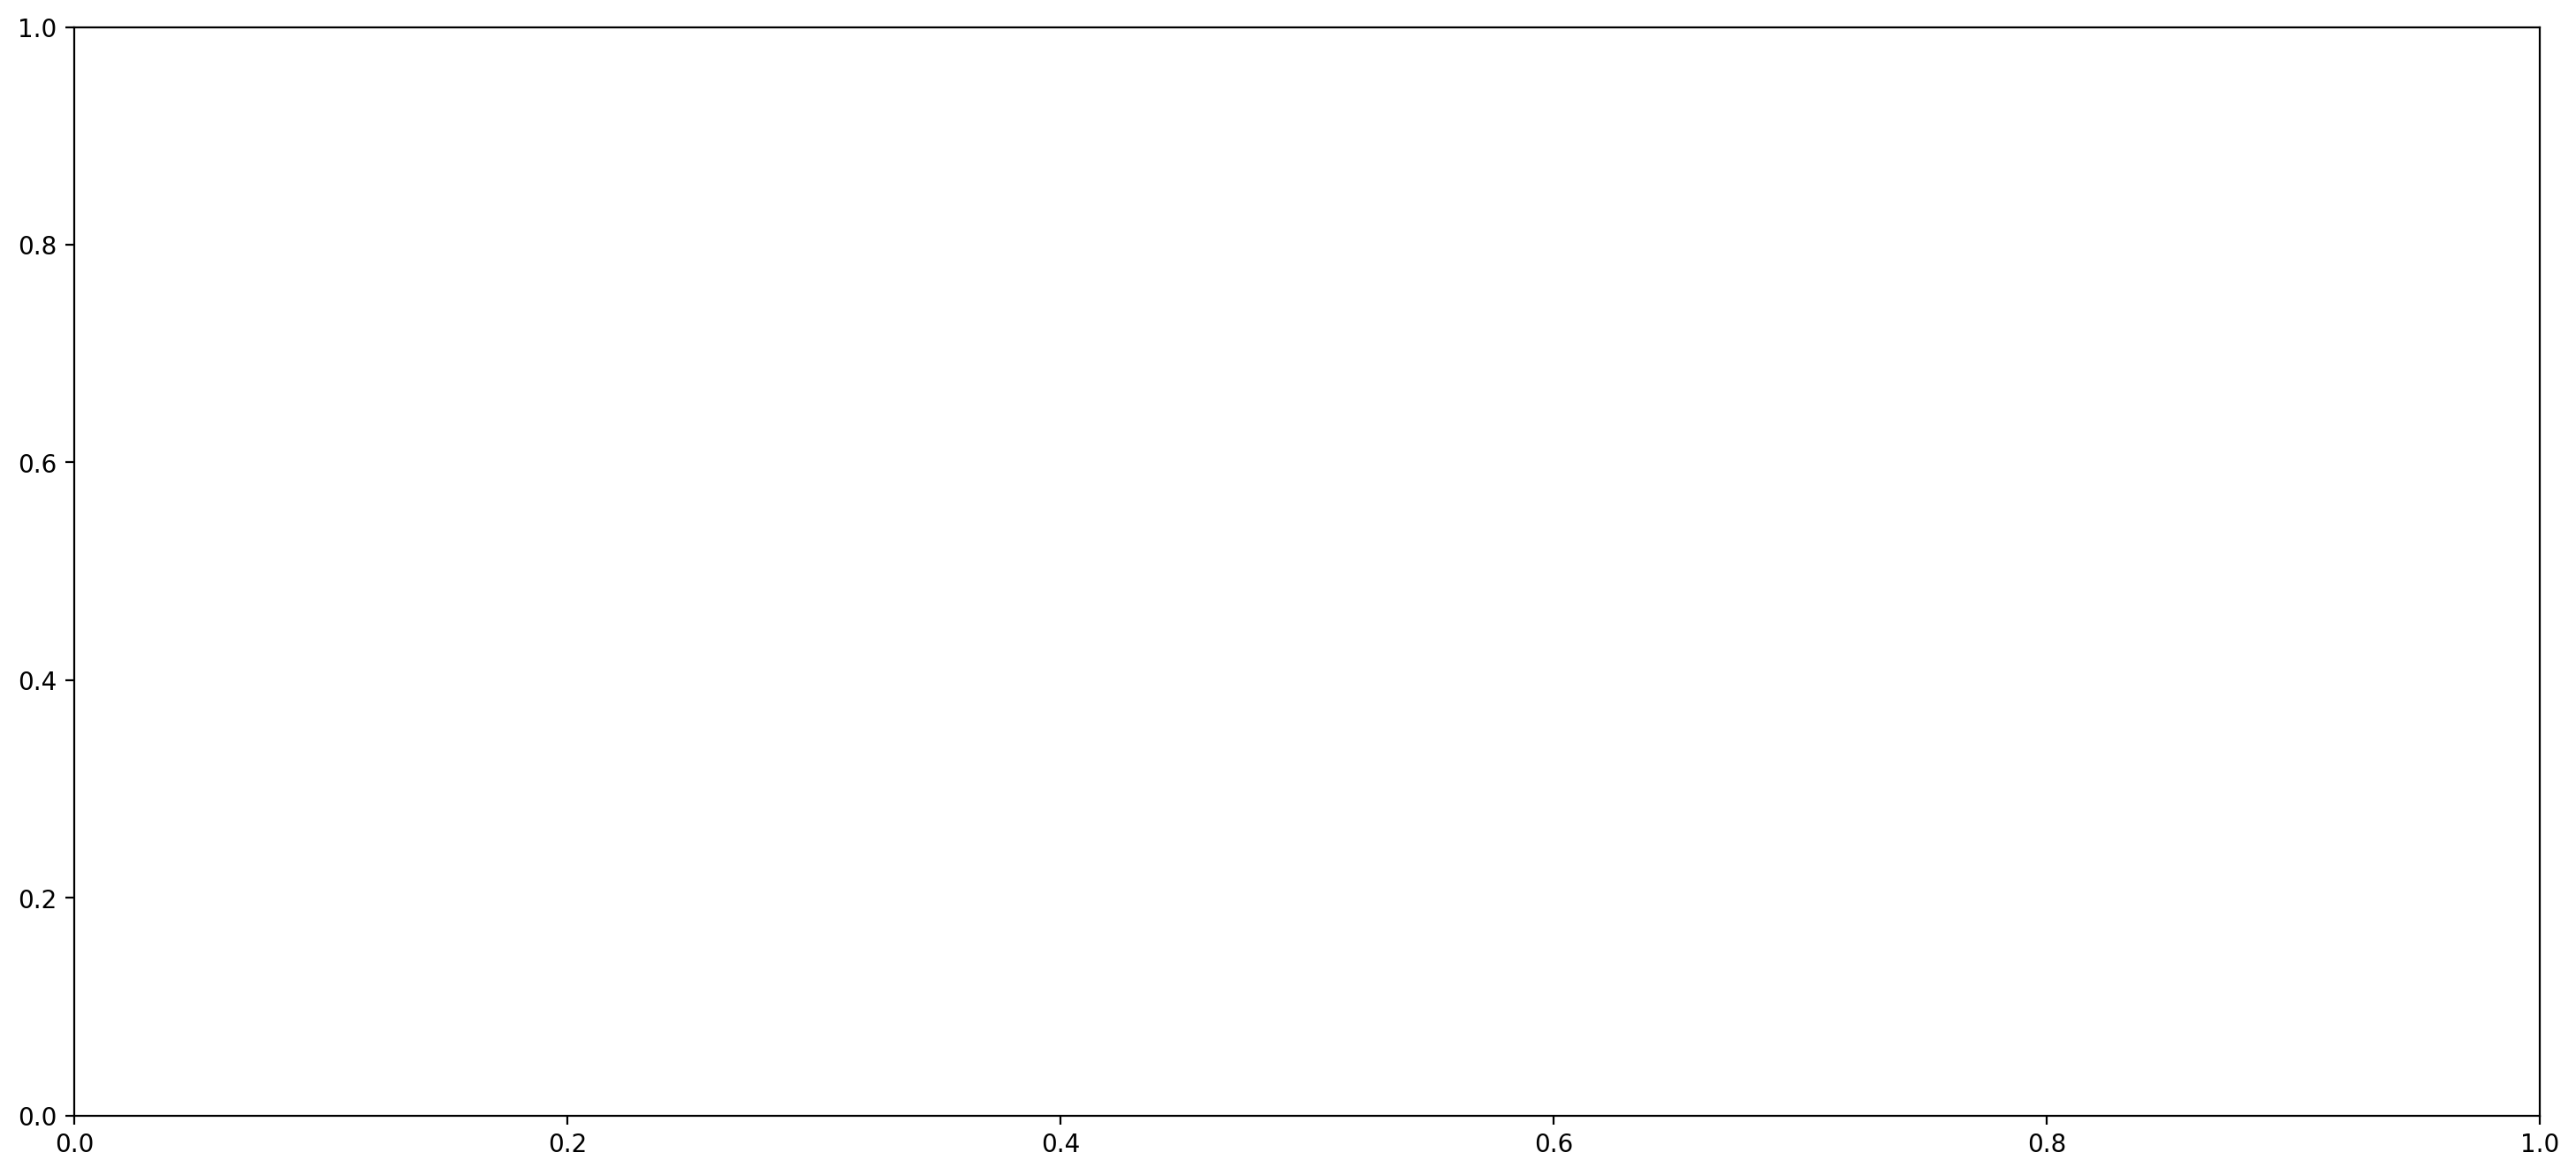

In [11]:
tdt_data_obj.plot_aligned_signals()

In [17]:
tdt_data_obj.compute_dFF()

array([0.00020787, 0.00020784, 0.00020779, ..., 0.00023353, 0.00023351,
       0.00023351])

In [18]:
tdt_data_obj

In [19]:
train_times = []
for i in range(1, len(tdt_data.epocs.Pu1_.onset)):
    time_since = tdt_data.epocs.Pu1_.onset[i] - tdt_data.epocs.Pu1_.onset[i-1]
    if time_since > 30:
        train_times += [float(tdt_data.epocs.Pu1_.onset[i])]
train_times = np.array(train_times)


In [20]:
train_times

array([  31.5342848 ,  143.30789888,  319.68198656,  482.08248832,
        652.43480064,  854.08546816, 1006.37147136, 1272.0996352 ,
       1427.52923648, 1734.78199296, 2151.38729984, 2479.22802688,
       2746.01541632, 3005.58680064, 3356.89170944, 3735.42109184,
       4069.92584704, 4319.97730816, 4887.6683264 , 5159.26441984,
       5478.23239168, 5762.18873856])

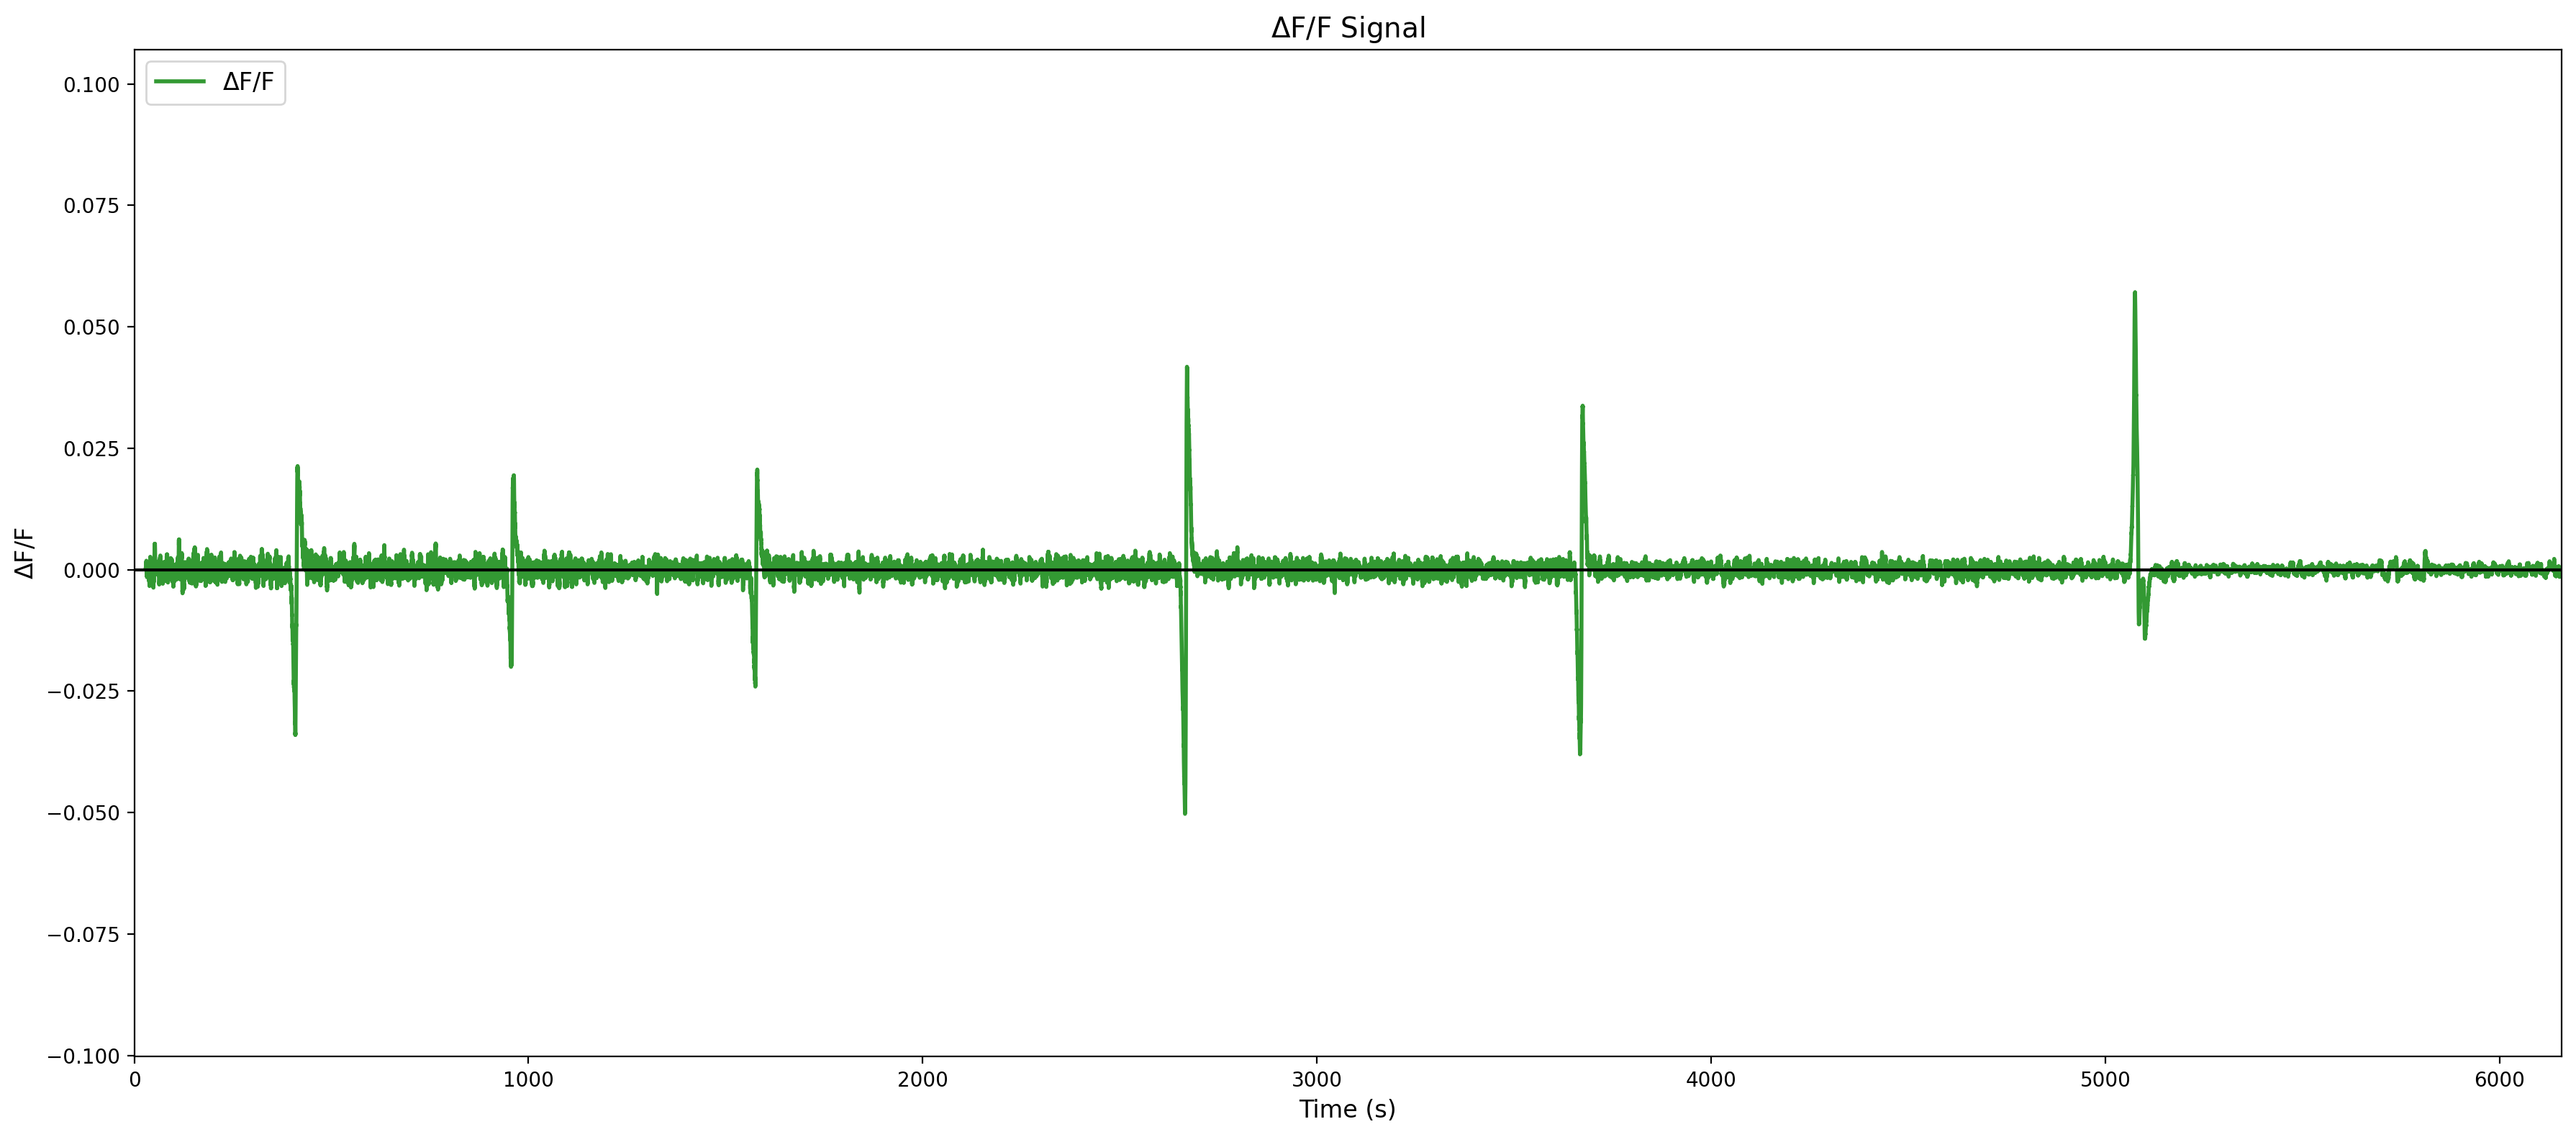

In [21]:
tdt_data_obj.plot_dFF()

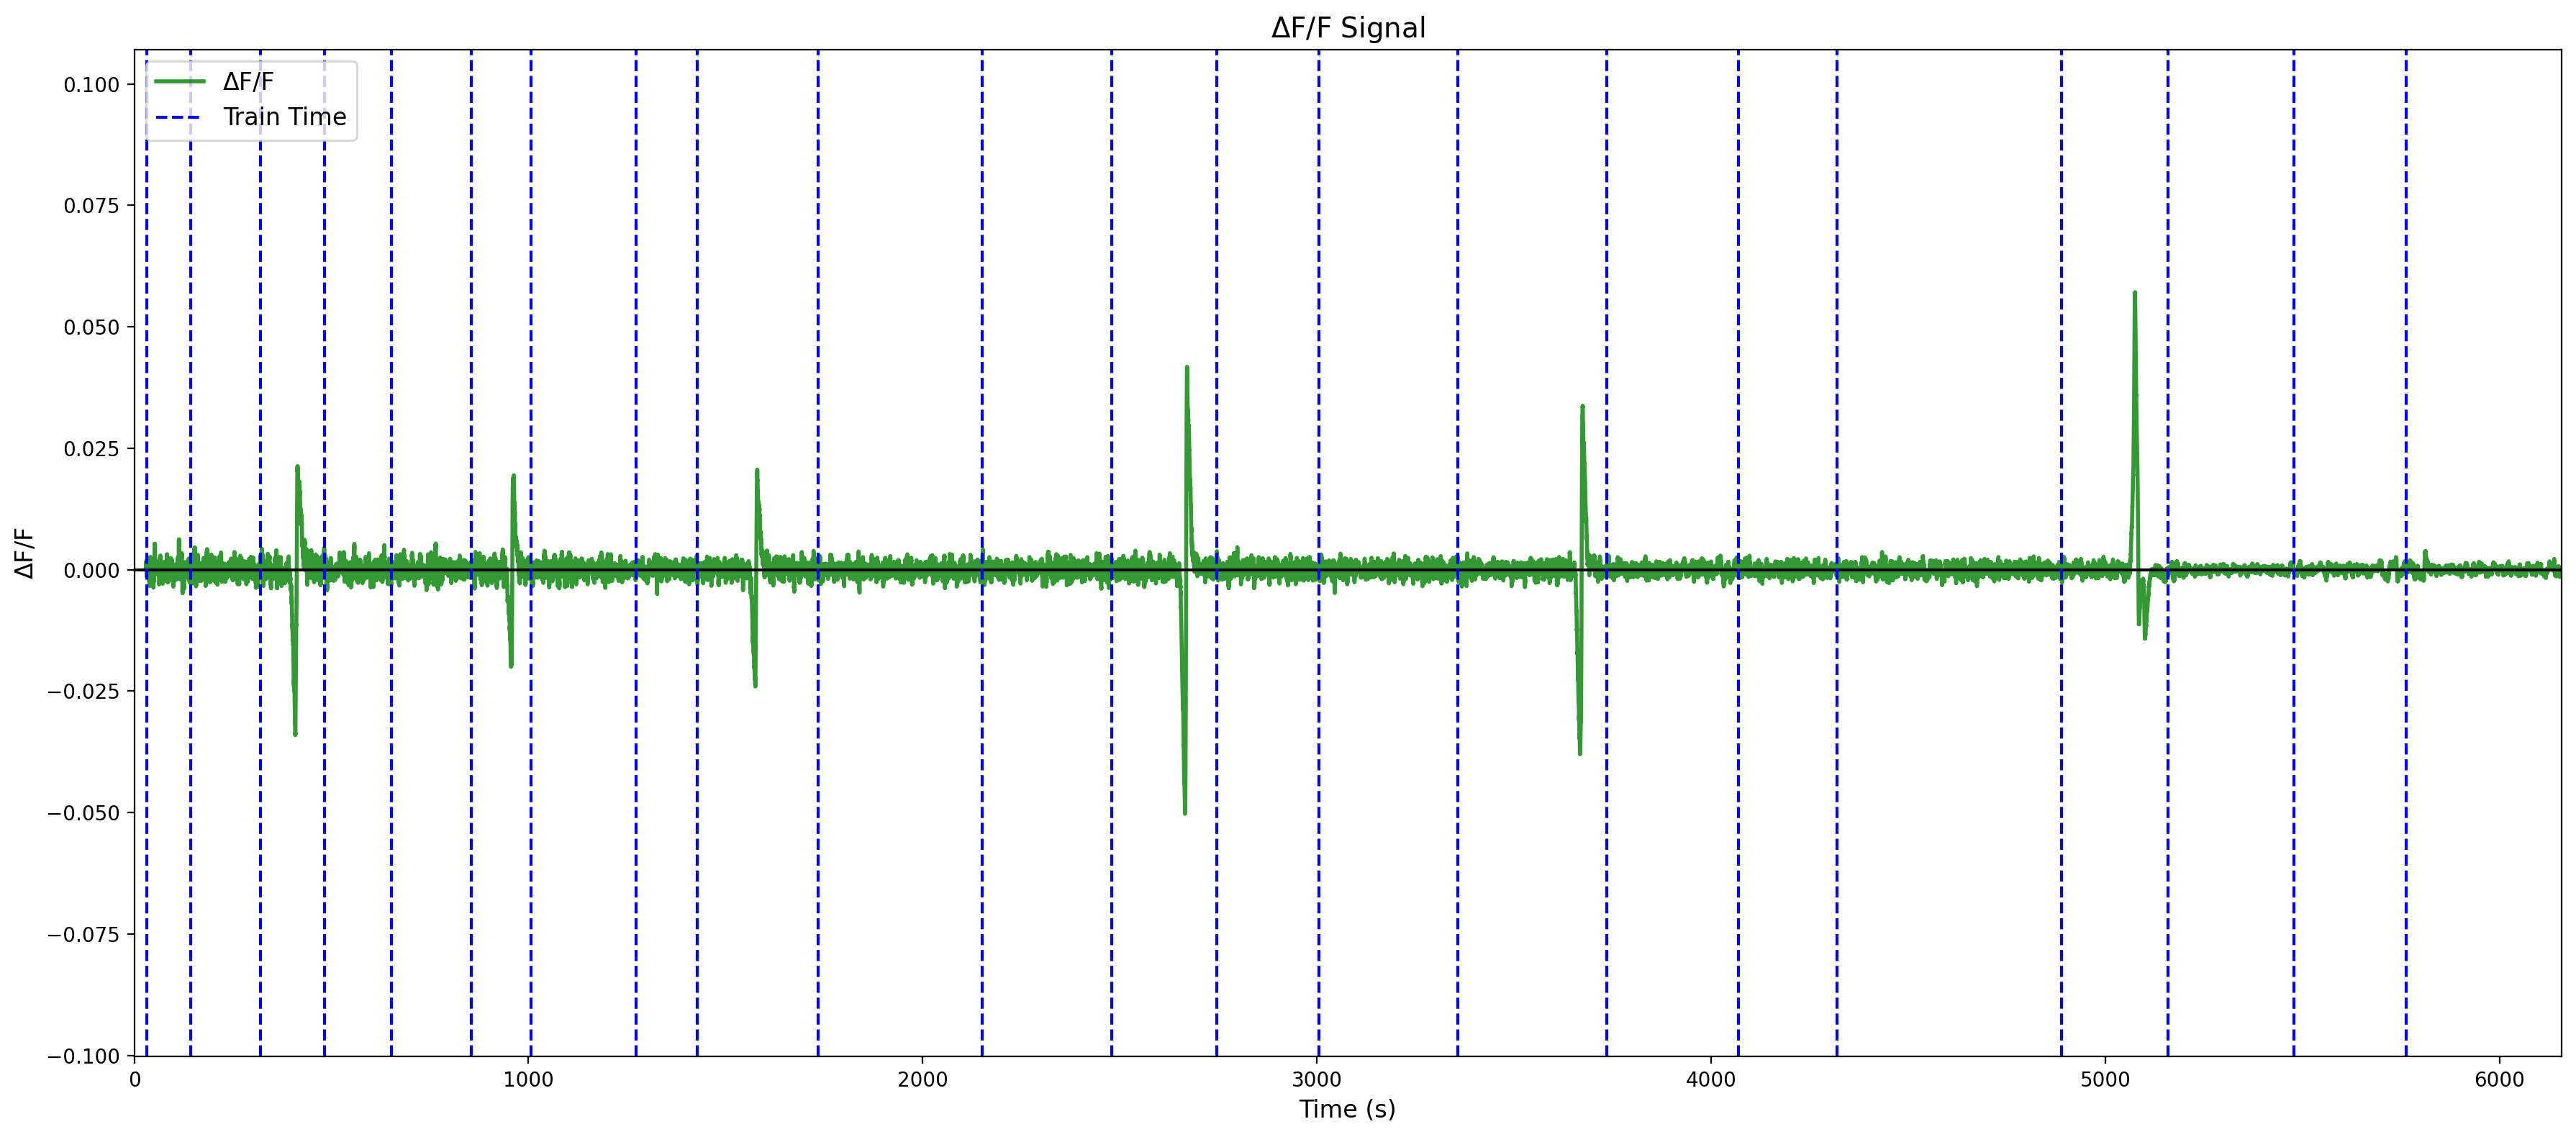

In [22]:
tdt_data_obj.plot_dFF_train_times(train_times=train_times)

In [23]:
tdt_data_obj.compute_zscore()

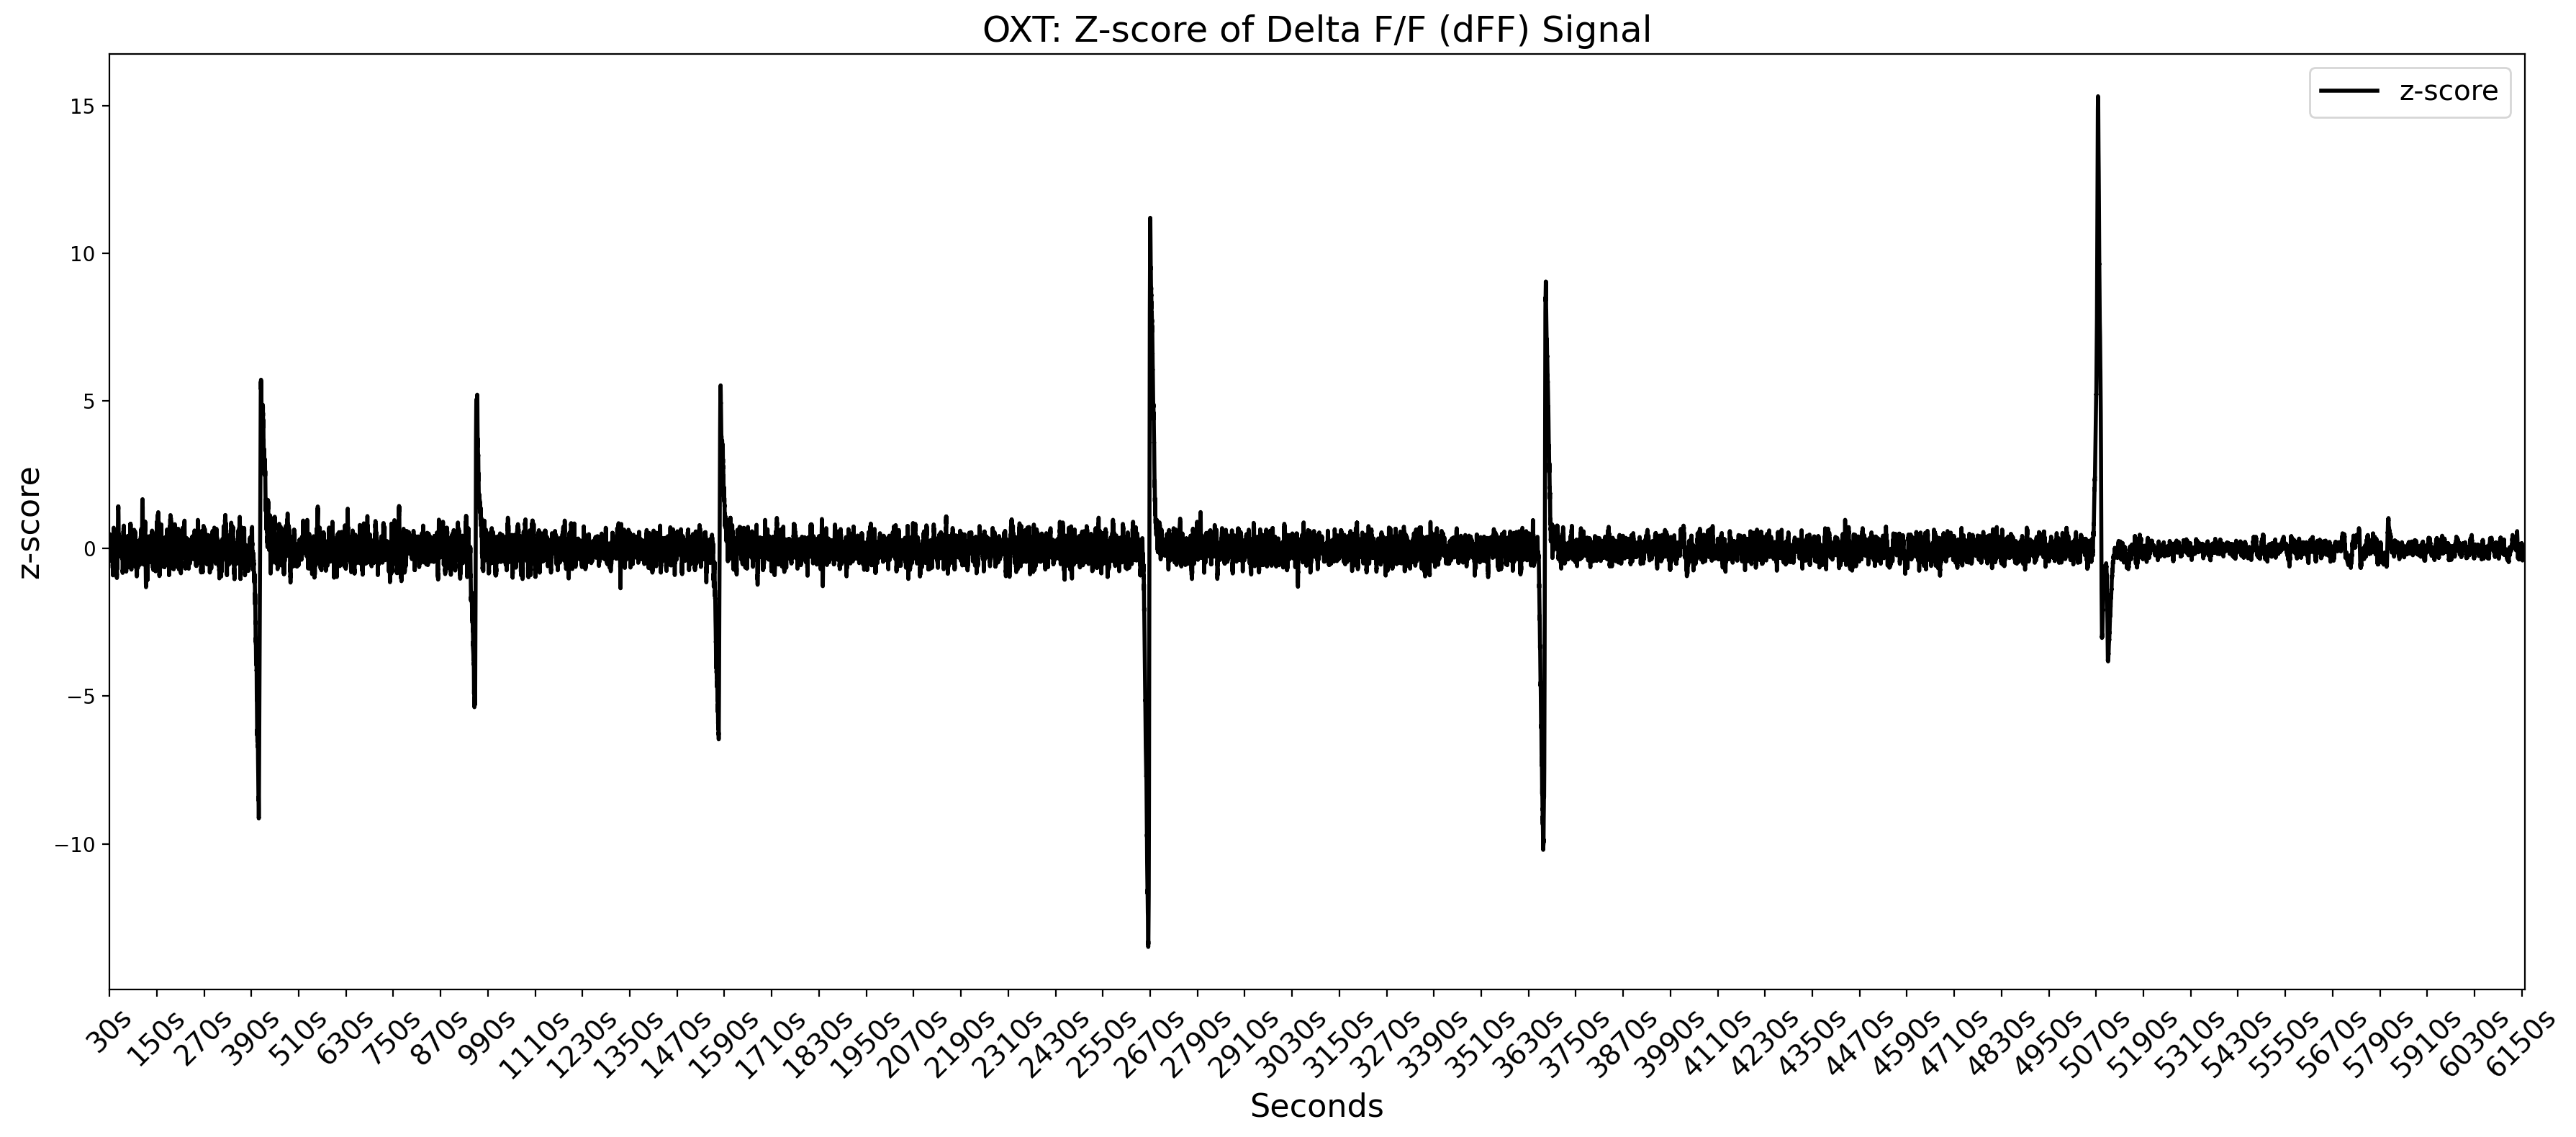

In [24]:
tdt_data_obj.plot_zscore()

## PETH

ValueError: Behavior event 'Investigation' not found in behaviors.

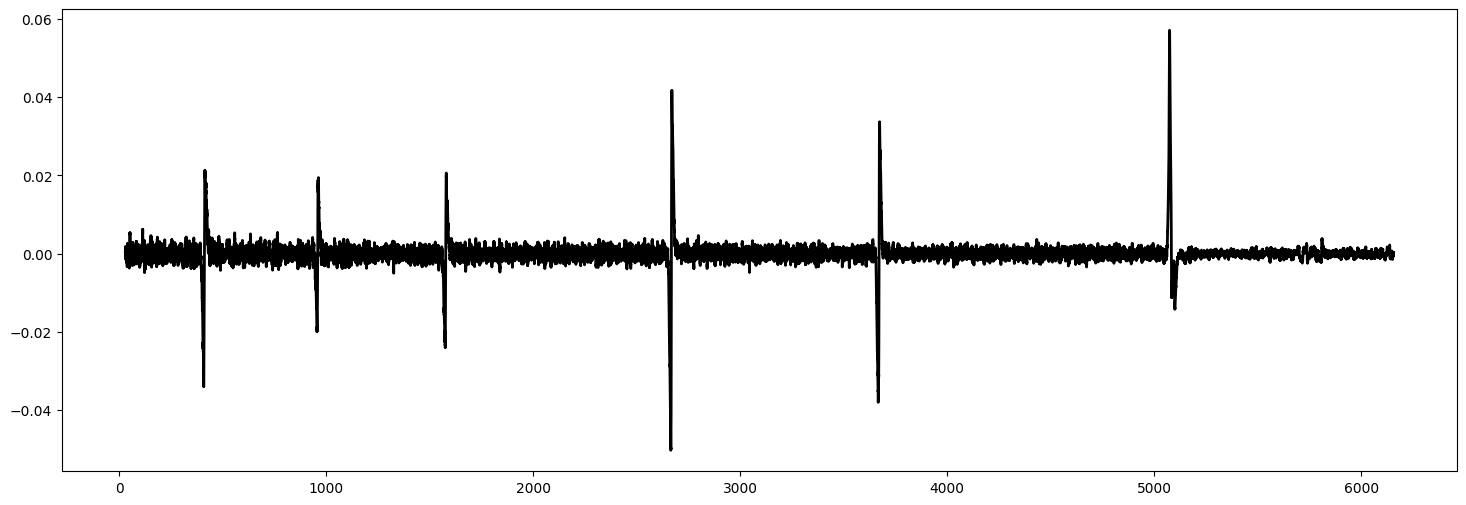

In [25]:
tdt_data_obj.plot_behavior_event(behavior_name='Investigation', plot_type='dFF')

In [ ]:
tdt_data_obj.compute_first_event_peth(behavior_name='Investigation', pre_time=3, post_time=3, bin_size=0.05)

In [ ]:
tdt_data_obj.plot_first_event_peth(signal_type='zscore')

In [ ]:
tdt_data_obj.compute_1st_event_peth(behavior_name='Investigation', pre_time=3, post_time=3, bin_size=0.1)

In [ ]:
tdt_data_obj.plot_1st_event_peth(signal_type='zscore')

Old method

In [ ]:
# # Downsample the data
# # tdt_data_obj.downsample_data(N = 16)

# # Compute dFF
# tdt_data_obj.compute_dff()
# tdt_data_obj.plot_signal('dFF')
# tdt_data_obj.compute_zscore()
# tdt_data_obj.print_behaviors()

## Mean DA during first of each behavior

In [ ]:
# tdt_data_obj.hab_dishab_extract_intruder_bouts(csv_base_path)
# tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')
# tdt_data_obj.smooth_signal()
# tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')
# tdt_data_obj.hab_dishab_find_behavior_events_in_bout()
# # tdt_data_obj.hc_get_first_behavior()
# tdt_data_obj.bout_dict